In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz').get_fdata()
image_data_zScore = nib.load('../images/Denoised_flair_paciente1.nii.gz').get_fdata()

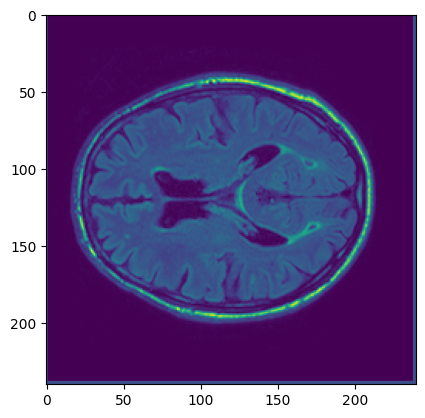

In [5]:
plt.imshow(image_data_zScore[:,:,23])

In [20]:
def median_filter(image_data):
    filtered_image = np.zeros_like(image_data)

    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                # Extraer la vecindad 3x3x3
                neighborhood = image_data[x-1:x+2, y-1:y+2, z-1:z+2]

                new_neighborhood = np.sort(neighborhood)
                
                # Calcular la mediana de la vecindad
                median_value = np.median(new_neighborhood)
                
                # Asignar el valor mediano al píxel filtrado
                filtered_image[x, y, z] = median_value

    return filtered_image

In [21]:
median_filter_arr = median_filter(image_data)

## Diferiencias centradas

In [9]:
def medianFilterBorders (image):
  # Median Filter with borders
	threshold = 2500
	filtered_image = np.zeros_like(image)

	for x in range(1, image.shape[0] - 2):
		for y in range(1, image.shape[1] - 2):
			for z in range(1, image.shape[2] - 2):
        # Compute the derivatives in x, y, and z directions
				dx = image[x + 1, y, z] - image[x - 1, y, z]
				dy = image[x, y + 1, z] - image[x, y - 1, z]
				dz = image[x, y, z + 1] - image[x, y, z - 1]

        # Compute the magnitude of the gradient
				magnitude = np.sqrt(dx * dx + dy * dy + dz * dz)

                    # Separate pixels based on the current threshold
				below_threshold = magnitude[magnitude < threshold]
				above_threshold = magnitude[magnitude >= threshold]
				threshold = (np.mean(below_threshold) + np.mean(above_threshold)) / 2

				if magnitude < threshold:
					neighbours = []
					for dx in range(-1, 2):
						for dy in range(-1, 2):
							for dz in range(-1, 2):
								neighbours.append(image[x + dx, y + dy, z + dz])
					median = np.median(neighbours)
					filtered_image[x, y, z] = median
				else:
					filtered_image[x, y, z] = image[x, y, z]
	return filtered_image

In [9]:
def meanFilterBorders (image):
  # Median Filter with borders
	threshold = 2500
	filtered_image = np.zeros_like(image)

	for x in range(1, image.shape[0] - 2):
		for y in range(1, image.shape[1] - 2):
			for z in range(1, image.shape[2] - 2):
        # Compute the derivatives in x, y, and z directions
				dx = image[x + 1, y, z] - image[x - 1, y, z]
				dy = image[x, y + 1, z] - image[x, y - 1, z]
				dz = image[x, y, z + 1] - image[x, y, z - 1]

        # Compute the magnitude of the gradient
				magnitude = np.sqrt(dx * dx + dy * dy + dz * dz)

                    # Separate pixels based on the current threshold
				below_threshold = magnitude[magnitude < threshold]
				above_threshold = magnitude[magnitude >= threshold]
				threshold = (np.mean(below_threshold) + np.mean(above_threshold)) / 2

				if magnitude < threshold:
					for x in range (0, image_data.shape[0]-2):
						for y in range(0, image_data.shape[1]-2):
							for z in range(0, image_data.shape[2]-2):
								# voxel_int = image_data[x,y,z]

								avg = 0

								for dx in range(-1,1) :
									for dy in range(-1,1) :
										for dz in range(-1,1) :
											avg = avg + image_data[x+dx, y+dy, z+dz]

								filtered_image[x,y,z] = avg / 3 ** 3
				else:
					filtered_image[x, y, z] = image[x, y, z]
	return filtered_image

In [10]:
dfmean = meanFilterBorders(image_data)

c:\Users\Carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
dfmedian = medianFilterBorders(image_data)
# dfmean = mean_filter_with_edges(image_data)

c:\Users\Carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


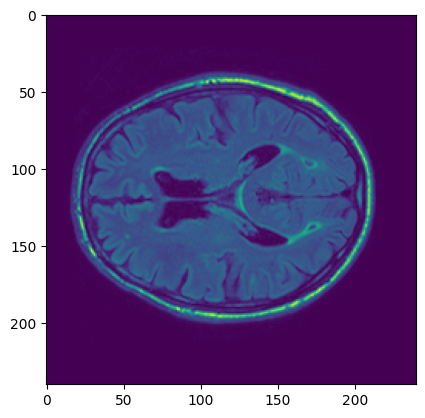

In [22]:
plt.imshow(dfmedian[:,:,23])

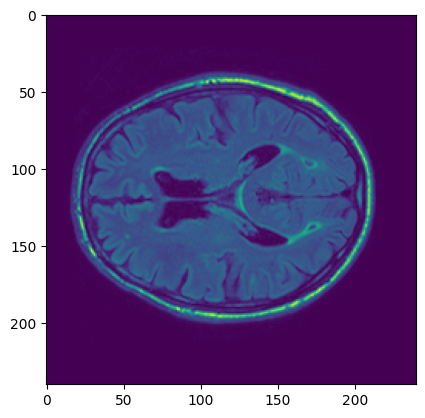

In [11]:
plt.imshow(dfmean[:,:,23])

In [17]:
def kmeans_segmentation(image, k, tol, max_iter):
    # Inicializamos los centroides con valores entre el mínimo y el máximo valor de la imagen
    centroids = np.linspace(np.min(image), np.max(image), k)

    for i in range(max_iter):
        # Calculamos la distancia entre los valores de la imagen y los centroides
        distances = np.abs(image - centroids[..., None, None, None])

        # Asignamos cada pixel a su centroide más cercano
        segmentation = np.argmin(distances, axis=0)

        # Calculamos los nuevos centroides como la media de los valores asignados a cada cluster
        new_centroids = np.array([np.mean(image[segmentation == j]) for j in range(k)])

        # Comprobamos si la diferencia entre los nuevos y los antiguos centroides es menor que la tolerancia
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        # Asignamos los nuevos centroides
        centroids = new_centroids

    return segmentation

In [18]:
res = kmeans_segmentation(dfmedian,10,1,10)

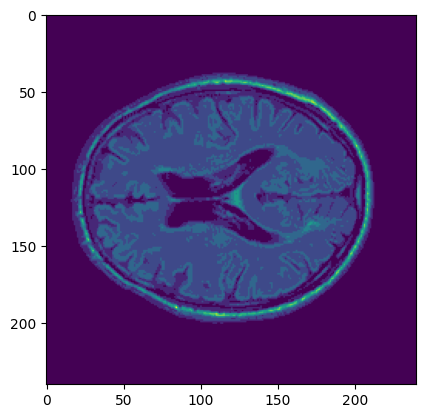

In [19]:
plt.imshow(res[:,:,24])

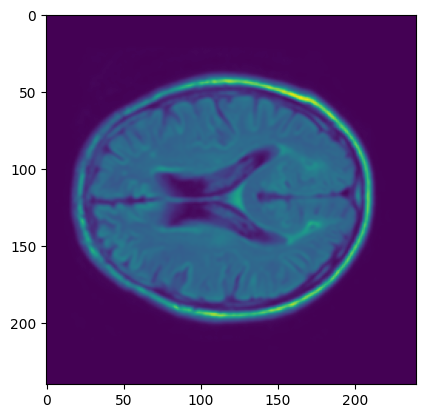

In [14]:
plt.imshow(dfmean[:,:,24])